In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

# load single example
def load_example( img_path ):

    Y = img_path[img_path.rfind('_')+1:-4]

    img = Image.open( img_path )
    img_mat = np.asarray( img )
    
    n_letters = len( Y )
    im_height = int(img_mat.shape[0])
    im_width = int(img_mat.shape[1]/n_letters)
    n_pixels = im_height*im_width
    
    X = np.zeros( [int(n_pixels+n_pixels*(n_pixels-1)/2),n_letters])
    for i in range(n_letters):
        
        # single letter
        letter = img_mat[:,i*im_width:(i+1)*im_width]/255
        
        # compute features
        x = letter.flatten()
        X[0:len(x),i] = x
        cnt = n_pixels 
        for j in range(0,n_pixels-1):
            for k in range(j+1,n_pixels):
                X[cnt,i] = x[j]*x[k]
                cnt = cnt + 1
           
        X[:,i] = X[:,i]/np.linalg.norm(X[:,i])
        
    return X, Y, img
    
# load all examples from a folder    
def load_examples( image_folder ):
    
    files = [f for f in listdir(image_folder) if isfile(join(image_folder, f))]

    X = []
    Y = []
    img = []
    for file in listdir(image_folder):
        path = join(image_folder, file)
        if isfile( path ):
                        
            X_,Y_,img_ = load_example( path )
            X.append( X_ )
            Y.append( Y_ )
            img.append( img_ )
        
    return X, Y, img
    


In [4]:
# load training examples
trn_X, trn_Y, trn_img = load_examples( 'ocr_names_images/trn' )

# load testing examples
tst_X, tst_Y, tst_img = load_examples( 'ocr_names_images/tst' )


#features=8256
#trn examples=1000
#tst examples=500


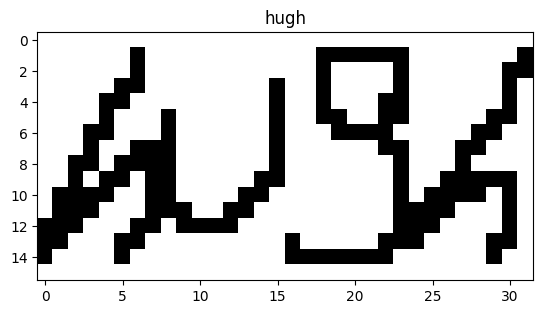

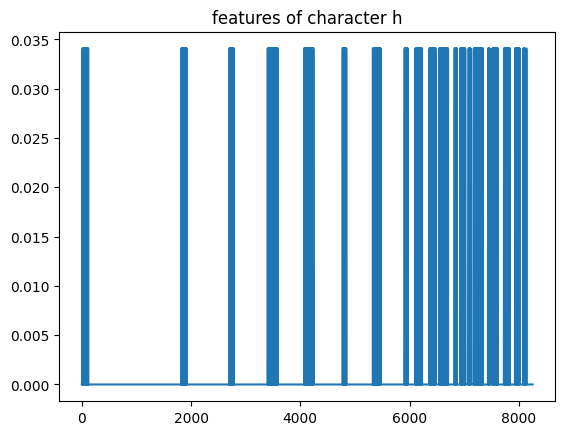

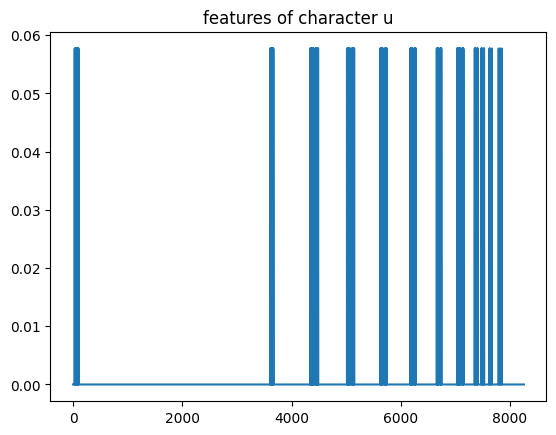

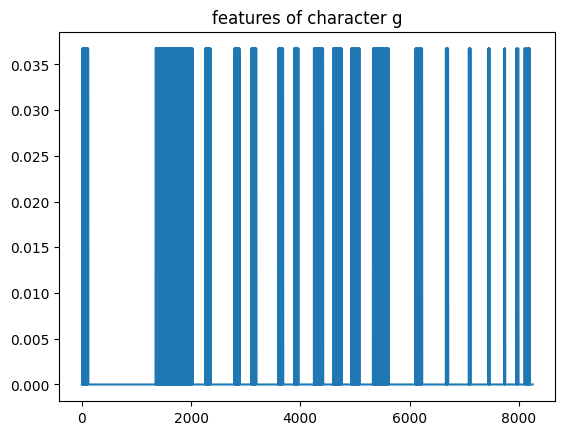

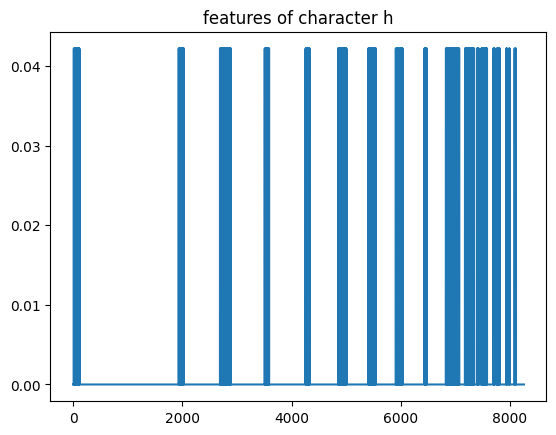

In [5]:
print(f"#features={trn_X[0].shape[0]}")
print(f"#trn examples={len(trn_X)}")
print(f"#tst examples={len(tst_X)}")


# show the first testing example 
plt.figure()
plt.imshow( tst_img[0], cmap='Greys')
plt.title( tst_Y[0] )

for i in range(tst_X[0].shape[1]):
    plt.figure()
    plt.plot( tst_X[0][:,i])
    plt.title(f"features of character {tst_Y[0][i]}")
